#  6장 건강상태를 알면 당뇨병을 예측할 수 있을까?

## 1 데이터 불러오기

피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/jamaltariqcheema/pima-indians-diabetes-dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jamaltariqcheema/pima-indians-diabetes-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jamaltariqcheema/pima-indians-diabetes-dataset/versions/1


1.1 파일 업로드하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.2 데이터프레임 생성하기

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/School_AI Study/250114/[kaggle]diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


##2. 탐색적 데이터 분석 및 전처리하기

2.1 데이터 살펴보기

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


2.2 빈도수 확인하기

(1) 클래스 빈도수 확인하기

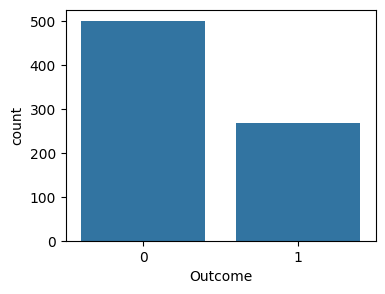

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,3))
sns.countplot(x="Outcome", data=df)
plt.show()

2.3 특징 통계값 확인하기

(1) 특징 통계값 확인하기

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(2) 속성별 0의 개수 확인하기

In [6]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows=df.loc[df[col]==0].shape[0]
  print(col+":", missing_rows)

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


2.4 이상치 확인하기




(1) 산점도로 이상치 확인하기

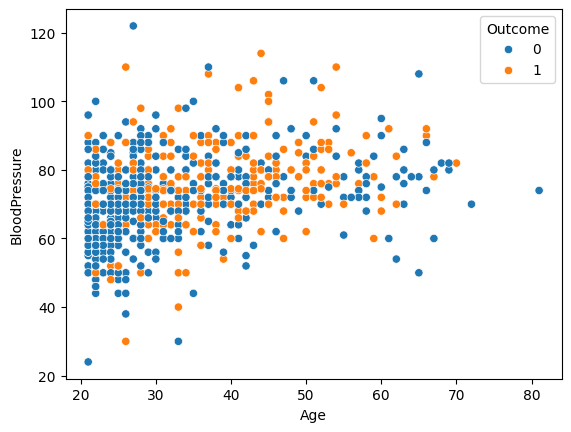

In [7]:
sns.scatterplot(x='Age', y='BloodPressure', hue='Outcome', data=df)
plt.show()

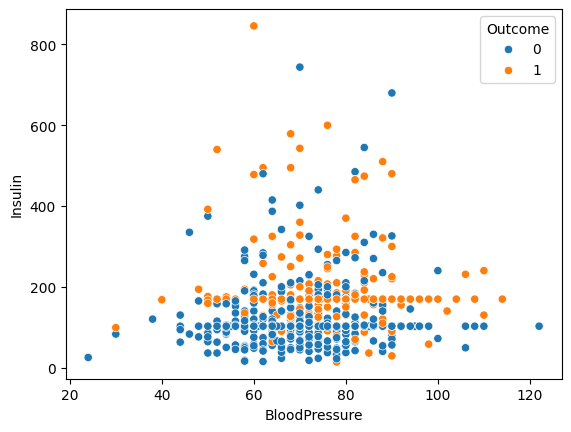

In [8]:
sns.scatterplot(x='BloodPressure', y='Insulin', hue='Outcome', data=df)
plt.show()

(2) 박스 플롯으로 이상치 확인하기

<Axes: >

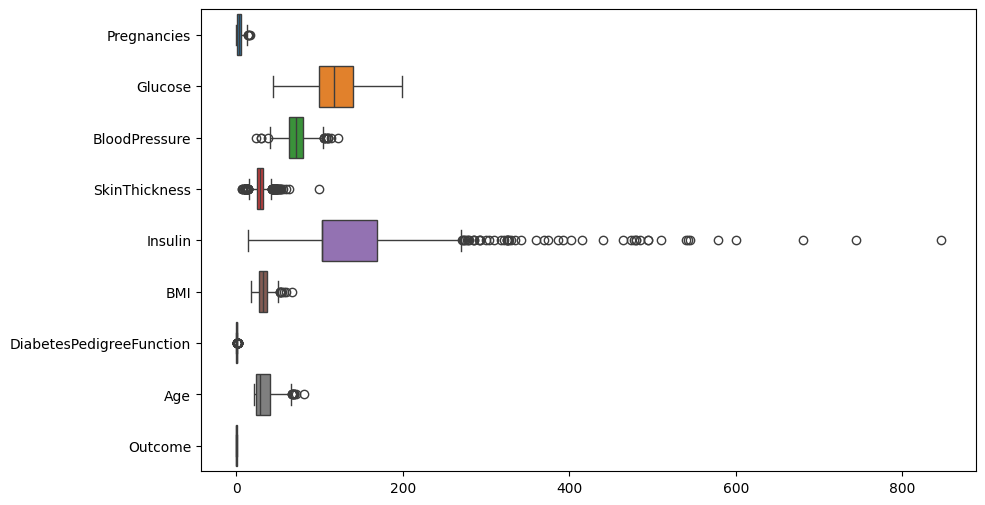

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient='h')

2.5 이상치 처리하기

In [10]:
Preg_range=(df.Pregnancies>=0)&(df.Pregnancies<=13.5)
Gluc_range=(df.Glucose>=38)&(df.Glucose<=202)
Bloo_range=(df.BloodPressure>=40)&(df.BloodPressure<=104)
Skin_range=(df.SkinThickness>=14.5)&(df.SkinThickness<=42.5)
Insu_range=(df.Insulin>=2)&(df.Insulin<=270)
BMI_range=(df.BMI>=13.85)&(df.BMI<=50.25)
diab_range=(df.DiabetesPedigreeFunction>=0)&(df.DiabetesPedigreeFunction<=1.201)
Age_range=(df.Age>=21)&(df.Age<=65.5)
df2=df.loc[Preg_range&Gluc_range&Bloo_range&Skin_range&Insu_range&BMI_range&diab_range&Age_range,:]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
5,5,116,74.0,27,102.5,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62.0,27,102.5,22.5,0.142,33,0
764,2,122,70.0,27,102.5,36.8,0.340,27,0
765,5,121,72.0,23,112.0,26.2,0.245,30,0
766,1,126,60.0,32,169.5,30.1,0.349,47,1


2.6 독립변수와 종속변수 선정하기




In [11]:
X = df2.drop('Outcome', axis = 1) # Outcome을 제외하고 독립변수 X에 저장
y = df2['Outcome']                # 종속변수 Outcome을 y에 저장

In [12]:
print("특징 모양: ", X.shape)
print("타깃 모양: ", y.shape)

특징 모양:  (586, 8)
타깃 모양:  (586,)


2.7 데이터 정규화하기

In [13]:
#  최소-최대 정규화(Min-Max Normalization)
X_scaled= (X-X.min())/(X.max()-X.min())
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.679739,0.466667,0.740741,0.604331,0.490446,0.493261,0.659091
1,0.076923,0.267974,0.366667,0.518519,0.340551,0.267516,0.245283,0.227273
2,0.615385,0.908497,0.333333,0.629630,0.604331,0.162420,0.533693,0.250000
3,0.076923,0.294118,0.366667,0.296296,0.307087,0.315287,0.079964,0.000000
5,0.384615,0.470588,0.500000,0.444444,0.340551,0.235669,0.110512,0.204545



2.8 훈련 데이터, 테스트 데이터 분할하기

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y)

In [17]:
print("훈련 데이터 : ", X_train.shape[0], y_train.shape[0])
print("테스트 데이터 : ", X_test.shape[0], y_test.shape[0])

훈련 데이터 :  410 410
테스트 데이터 :  176 176


## **3. 모델 생성하기**

3.1 나이브 베이즈 분류 모델 학습하기

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes 모델 생성
model = GaussianNB()

# 모델 학습
model.fit(X_train, y_train)

GaussianNB()

3.2 회귀계수와 절편 확인하기

In [ ]:
"""import numpy as np
w=model.coef_          #회귀 계수
b=model.intercept_     #절편
print("w= ", np.round(w,2))
print("b= ", np.round(b,2))  #np.round()를 이용하여 소숫점 2자리까지 출력"""

'import numpy as np\nw=model.coef_          #회귀 계수\nb=model.intercept_     #절편\nprint("w= ", np.round(w,2))\nprint("b= ", np.round(b,2))  #np.round()를 이용하여 소숫점 2자리까지 출력'

In [ ]:
import numpy as np

# 클래스별 사전 확률 확인
class_prior = model.class_prior_  # 클래스별 사전 확률
print("클래스별 사전 확률: ", np.round(class_prior, 2))


클래스별 사전 확률:  [0.68 0.32]


3.3 모델 성능 확인하기

In [ ]:
print("훈련 데이터로 학습한 모델 분류 정확도 : ", model.score(X_train, y_train))

훈련 데이터로 학습한 모델 분류 정확도 :  0.8609756097560975


## **4. 모델 평가 및 예측하기**

4.1 모델 성능 평가하기

In [ ]:
print("테스트 데이터를 이용한 모델 성능 평가 : ", model.score(X_test, y_test))

테스트 데이터를 이용한 모델 성능 평가 :  0.8636363636363636


4.2 테스트 데이터 예측하기

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("예측")
print(y_pred[5:10])
line()
print("결과")
print(y_test[5:10])

예측
[0 0 1 1 0]
--------------------------------------------------
결과
615    0
677    0
399    1
487    0
334    0
Name: Outcome, dtype: int64


혼동 행렬 확인하기

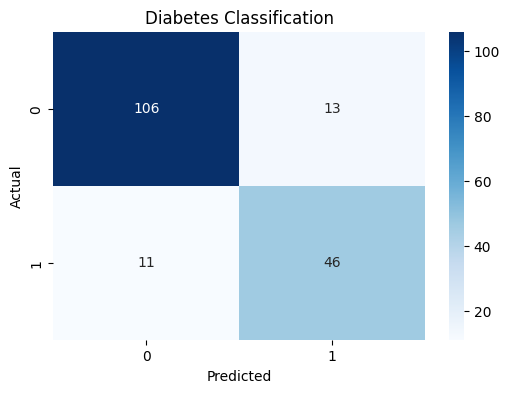

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, cmap="Blues",fmt="g")
plt.title("Diabetes Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##4.3 모델 개선하기

<Axes: xlabel='Outcome'>

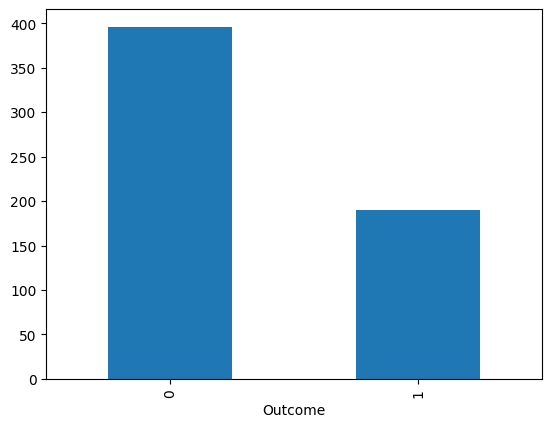

In [ ]:
y.value_counts().plot(kind = 'bar')              # y의 빈도수 확인

(1) SMOTE 활용 오버샘플링

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X2, y2 = oversample.fit_resample(X,y)   # SMOTE 활용 데이터 개수 맞축기

In [ ]:
y2.value_counts()     # 오버샘플링 후 y2의 빈도수 확인

,count
Outcome,
1,396
0,396


(2) 데이터 정규화하기

In [ ]:
# 최소-최대 정규화(Min-Max Normalization)
X2_scaled= (X2-X2.min())/(X2.max()-X2.min())
X2_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.679739,0.466667,0.740741,0.604331,0.490446,0.493261,0.659091
1,0.076923,0.267974,0.366667,0.518519,0.340551,0.267516,0.245283,0.227273
2,0.615385,0.908497,0.333333,0.629630,0.604331,0.162420,0.533693,0.250000
3,0.076923,0.294118,0.366667,0.296296,0.307087,0.315287,0.079964,0.000000
4,0.384615,0.470588,0.500000,0.444444,0.340551,0.235669,0.110512,0.204545


(3) 훈련 데이터와 테스트 데이터 분할하기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2_scaled, y2, test_size=0.3, stratify=y2)

(4) 개선된 모델 학습하기

In [ ]:
"""model2 = LogisticRegression( solver='lbfgs', max_iter=1000, random_state=42)
model2.fit(X_train,y_train)"""

"model2 = LogisticRegression( solver='lbfgs', max_iter=1000, random_state=42)\nmodel2.fit(X_train,y_train)"

In [ ]:
"""print("개선된 모델 분류 정확도 : ", model2.score(X_train, y_train))"""

'print("개선된 모델 분류 정확도 : ", model2.score(X_train, y_train))'

In [ ]:
# 개선된 모델 생성 및 학습
model2 = GaussianNB()
model2.fit(X_train, y_train)

print("개선된 모델 분류 정확도: ", model2.score(X_train, y_train))

개선된 모델 분류 정확도:  0.8772563176895307


(5) 개선된 모델 성능 평가하기

In [ ]:
from sklearn import metrics
y_pred2 = model2.predict(X_test)
print("개선된 모델 성능 평가:",metrics.accuracy_score(y_test, y_pred2))      # 실제값과 모델2의 예측값 비교

개선된 모델 성능 평가: 0.865546218487395


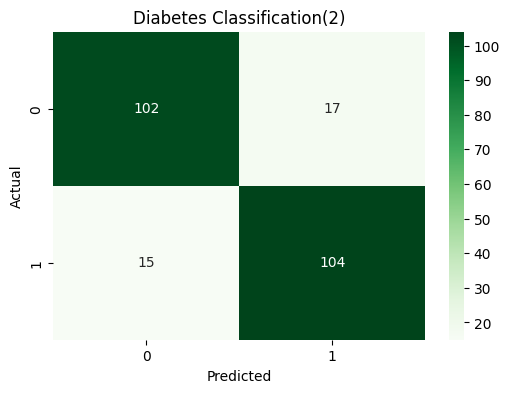

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))

conf = confusion_matrix(y_test,y_pred2)
sns.heatmap(conf, annot=True, cmap="Greens",fmt="g")

plt.title("Diabetes Classification(2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 5 모델 활용하기

5.1 새로운 데이터 불러오기

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/School_AI Study/250114/new_diabetes.csv')
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10,168,74,30,100,38.0,0.537,34
1,4,129,86,20,270,35.1,0.231,23
2,7,155,54,35,180,30.5,0.588,40
3,2,75,64,25,50,29.7,0.370,33
4,1,99,65,16,55,23.6,0.666,27


5.2 새로운 데이터 스케일링하기

In [ ]:
"""#  최소-최대 정규화(Min-Max Normalization)
df_new_scaled = (df_new-X2.min())/(X2.max()-X2.min())"""

'#  최소-최대 정규화(Min-Max Normalization)\ndf_new_scaled = (df_new-X2.min())/(X2.max()-X2.min())'

In [ ]:
"""df_new_scaled"""

'df_new_scaled'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_new_scaled = scaler.fit_transform(df_new)

In [ ]:
# 스케일링된 데이터 확인
print(pd.DataFrame(df_new_scaled).head())

          0         1        2         3         4         5         6  \
0  1.000000  1.000000  0.62500  0.736842  0.227273  1.000000  0.703448   
1  0.333333  0.580645  1.00000  0.210526  1.000000  0.798611  0.000000   
2  0.666667  0.860215  0.00000  1.000000  0.590909  0.479167  0.820690   
3  0.111111  0.000000  0.31250  0.473684  0.000000  0.423611  0.319540   
4  0.000000  0.258065  0.34375  0.000000  0.022727  0.000000  1.000000   

          7  
0  0.647059  
1  0.000000  
2  1.000000  
3  0.588235  
4  0.235294  


5.3 새로운 데이터 예측하기

In [ ]:
"""print(model2.predict(df_new_scaled))"""

'print(model2.predict(df_new_scaled))'

In [ ]:
# 새로운 데이터 예측
new_predictions = model2.predict(df_new_scaled)
print("새로운 데이터 예측 결과: ", new_predictions)

새로운 데이터 예측 결과:  [1 0 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
